In [1]:
#Project 5: Customer Segmentation with Clustering 🛍️

## Project Objective: To use unsupervised machine learning to identify distinct groups of customers within a mall's dataset. By segmenting customers based on multiple dimensions (income, age, spending habits), we can provide rich, actionable insights to the marketing team for highly targeted campaigns.

In [2]:
##STEP 1 : IMPORTING ALL THE IMPORTANT LIBRARIES
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.express as plx
import scipy.cluster.hierarchy as sch

sns.set_style('whitegrid')

In [3]:
!pip install plotly
!pip install scipy 

In [4]:
##STEP 2 : SETTING UP THE DATAFRAME
mall_df = pd.read_csv('Mall_Customers.csv')
mall_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
print(f"Overall Abstract Information about the Dataset :")
mall_df.info()

print(f"Shape of the Dataset : ")
mall_df.shape

print(f"Statistical Information about the Dataset :")
mall_df.describe()

Overall Abstract Information about the Dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
Shape of the Dataset : 
Statistical Information about the Dataset :


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


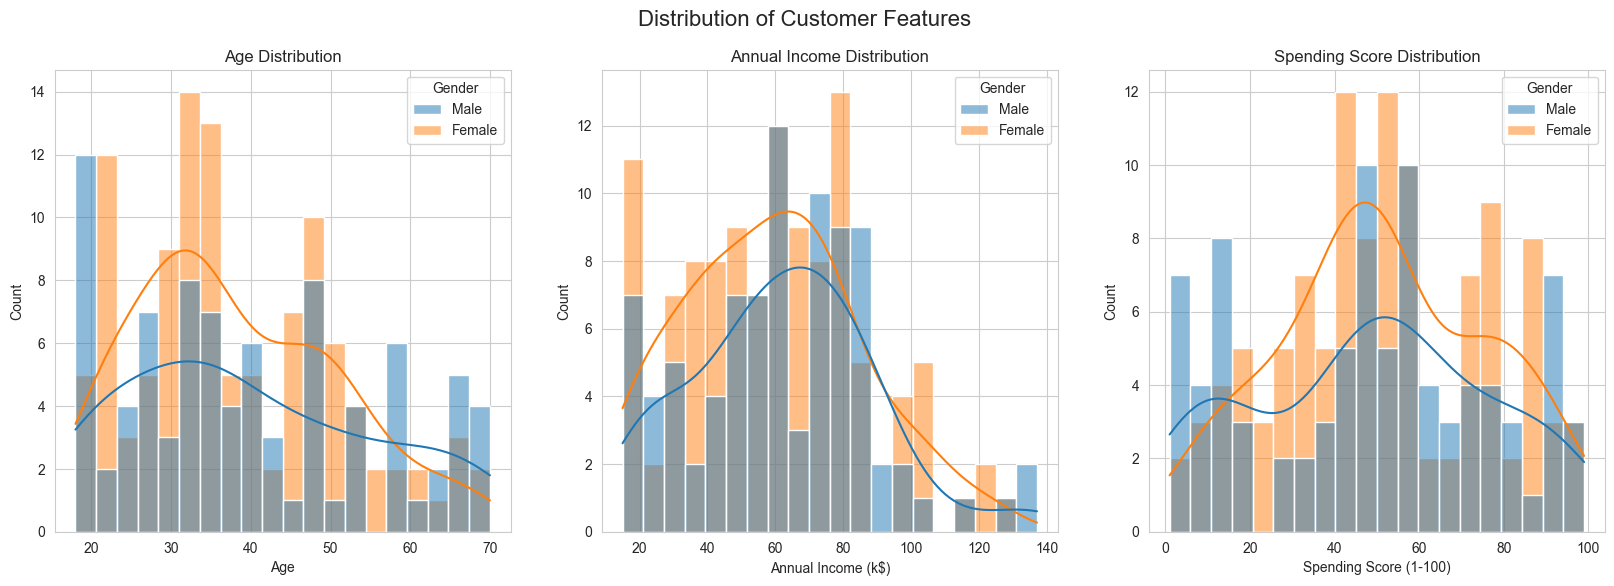

In [6]:
##STEP 3 : UNIVARIATE ANALYSIS
fig , axes = plt.subplots(1,3,figsize=(20,6))
fig.suptitle('Distribution of Customer Features',fontsize=16)

sns.histplot(ax=axes[0],data=mall_df,x='Age',hue='Gender',kde=True,bins=20).set_title('Age Distribution')
sns.histplot(ax=axes[1],data=mall_df,x='Annual Income (k$)',hue='Gender',kde=True,bins=20).set_title('Annual Income Distribution')
sns.histplot(ax=axes[2],data=mall_df,x='Spending Score (1-100)',hue='Gender',kde=True,bins=20).set_title('Spending Score Distribution')

plt.show()

In [7]:
#OBSERVATION: 'Gray color means overlapping' Males and females with high annual income have larger bins. The majority of the spending comes from people in the age range of 20–35.

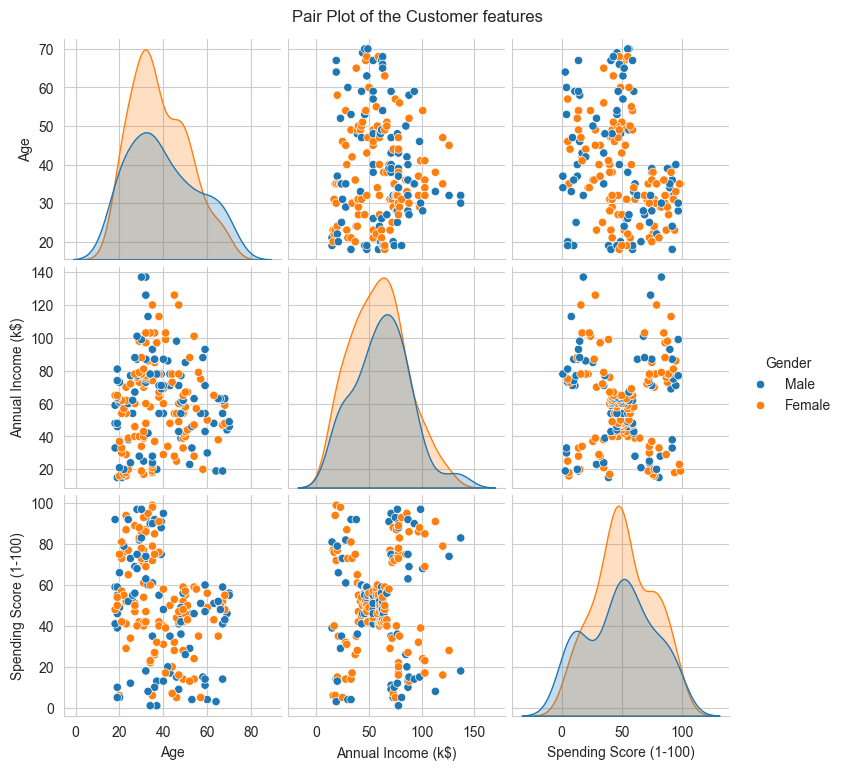

In [8]:
##STEP 4 : BIVARIATE ANALYSIS

sns.pairplot(mall_df,vars=['Age','Annual Income (k$)','Spending Score (1-100)'],hue='Gender',diag_kind='kde')
plt.suptitle('Pair Plot of the Customer features',y=1.02)
plt.show()

In [9]:
#OBSERVATION : 'Female' show more spike than 'Male'. “Annual Income vs Spending Score" shows clear seperation of data points, no overlapping, hence suitable for segmentation  

In [10]:
figure = plx.scatter_3d(mall_df,x='Annual Income (k$)',y='Spending Score (1-100)',z='Age',color='Gender',title='3D View of Pair Plot') 
figure.show()

In [11]:
##STEP 5 : DETERMINE THE NUMBER OF CLUSTERS (OPTIMALLY)
#for that we use ELbow Method
###STEP 1 : SCALE THE VARIABLES UNIFORMLY
scaler = StandardScaler()
x1 = mall_df[['Annual Income (k$)','Spending Score (1-100)']]
x1_scaled = scaler.fit_transform(x1)

In [12]:
###STEP 2 : IMPLEMENT THE ELBOW METHOD
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init='k-means++',random_state=42,n_init=10)
    kmeans.fit(x1_scaled)
    wcss.append(kmeans.inertia_)

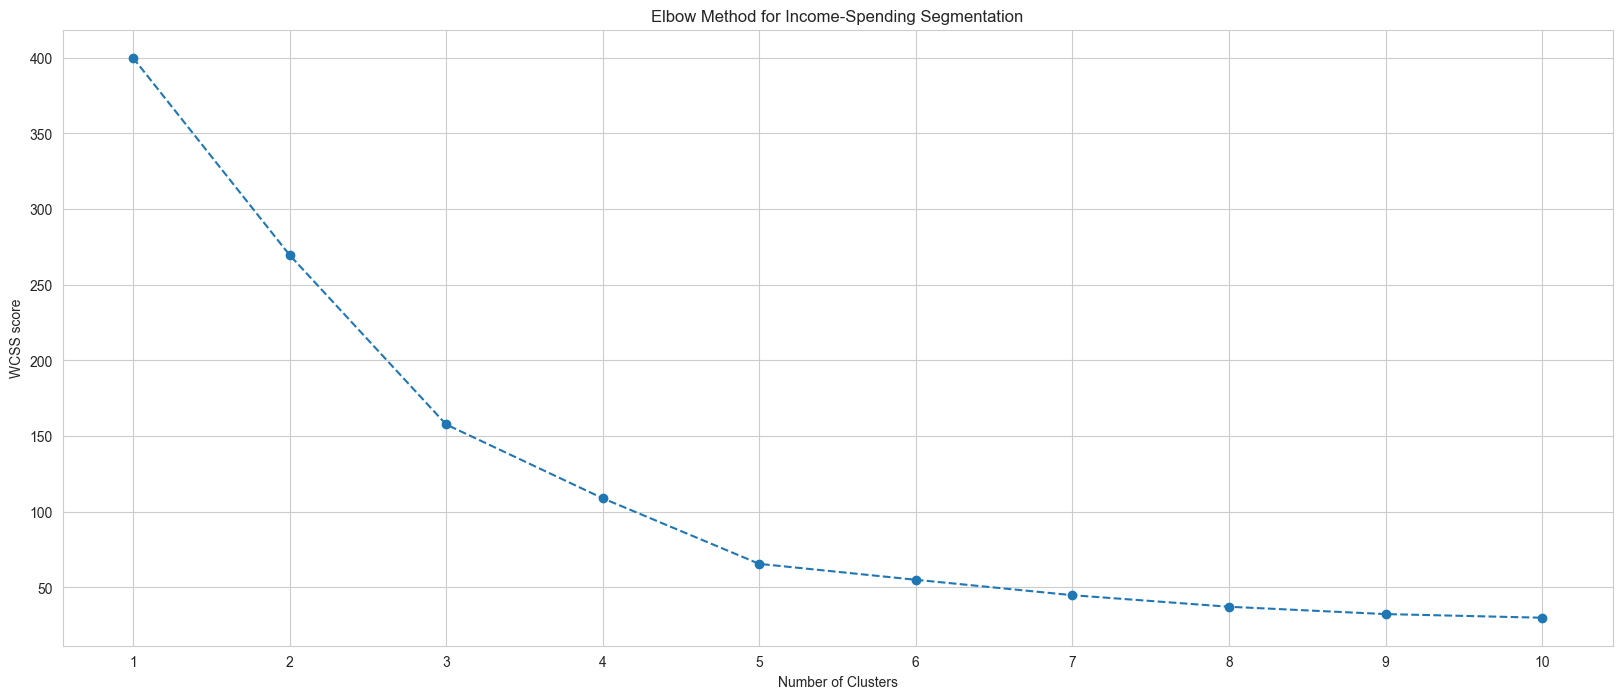

In [13]:
###STEP 3 : VISUALIZE THE ELBOW METHOD
plt.figure(figsize=(20,8))
plt.plot(range(1,11),wcss,linestyle='--',marker='o')
plt.title('Elbow Method for Income-Spending Segmentation')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS score')
plt.xticks(range(1,11))
plt.show()

In [14]:
##OBSERVATION : k=5 is optimal cluster size which we found out using Elbow Method

In [15]:
##STEP 6 : FINAL MODEL BUILDING 
kmeans1 = KMeans(n_clusters=5,random_state=42,init='k-means++',n_init=10)
mall_df['income_cluster'] = kmeans1.fit_predict(x1_scaled)

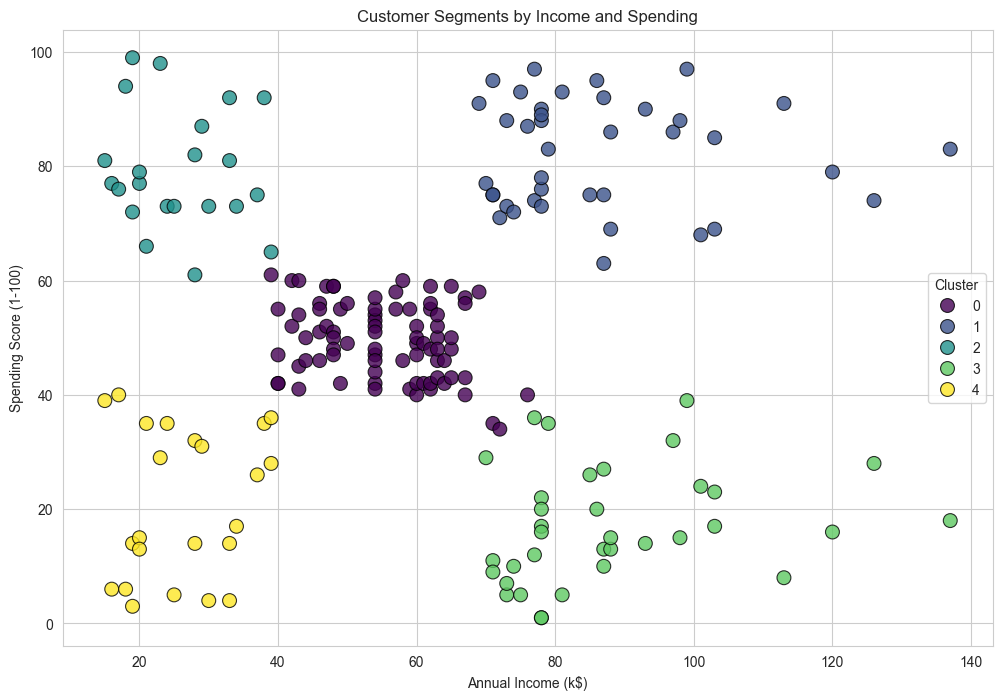

In [16]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=mall_df,
               x='Annual Income (k$)', y='Spending Score (1-100)',
               hue='income_cluster',
               alpha=0.8,
               edgecolor='black',
                palette='viridis',
               s=100).set_title('Customer Segments by Income and Spending')
plt.legend(title='Cluster')
plt.show()

In [17]:
##QUANTITATIVE PERSONA ANALYSIS
cluster_profiles = mall_df.groupby('income_cluster')[['Age','Annual Income (k$)','Spending Score (1-100)']].mean().round(2)
cluster_profiles

,Age,Annual Income (k$),Spending Score (1-100)
income_cluster,,,
0,42.72,55.30,49.52
1,32.69,86.54,82.13
2,25.27,25.73,79.36
3,41.11,88.20,17.11
4,45.22,26.30,20.91


In [ ]:
cluster_profile['Size'] = mall_df['income_cluster'].value_counts()